# Introduction
This notebook was created to learn basic techniques of data manipulation and machine learning. The idea is to use the dataset UCI_Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.


## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Goal and plan

Looking at the problem, I see a potential use of this kind of data: how well can we predict, month by month, the default of our clients? In other words, how well our model performs if we just use the data of the first 2 months with respect to when we use 6 months of payment history? 

However, since I have a lot of ground to cover, I will focus on a simpler problem: can I predict the default with a month of advance?

The notebook is structured as follows:

* First exploration: just to see what we have.
* Cleaning: time to make choices about undocumented labels
* Feature engineering: time to be creative
* Final result and lessons learned

There is an extra step: blind machine learning, because with my short experience I have already found a few pitfalls in my process and I want to share them.

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline

In [2]:
# Load the data

df = pd.read_csv(r'C:\Users\Admin\Downloads\data science\Classification Dataset\Credit default\UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7992,7993,50000.0,2,2,2,23,2,2,2,3,...,34076.0,34685.0,33976.0,2000.0,2800.0,0.0,1300.0,0.0,3700.0,1
4849,4850,140000.0,2,1,2,27,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2943.0,0
338,339,50000.0,2,2,1,31,0,0,0,0,...,30929.0,30078.0,29170.0,1974.0,4406.0,1061.0,1073.0,1046.0,1047.0,1
28918,28919,210000.0,2,2,1,46,-1,2,-1,-1,...,0.0,0.0,0.0,0.0,21451.0,0.0,0.0,0.0,0.0,0
26164,26165,110000.0,2,1,2,28,0,0,2,2,...,-18.0,-18.0,-18.0,3400.0,0.0,0.0,0.0,0.0,0.0,1


As a first step, let's have a look if there are missing or anomalous data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


No missing data, but a few anomalous things:
* EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
* MARRIAGE has a label 0 that is undocumented

In [5]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later

In [6]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values can be interpreted as credit? Has to be investigated

In [7]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

The range is very broad, Investigation required.

Two columns bother me because are poorly labeled.

In [9]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
# I am interested in having a general idea of the default probability
df.def_pay.sum() / len(df.def_pay)

0.2212

In [11]:
# Other ways of getting this kind of numbers (as a reference for newbies like myself)
print(df.shape)
print(df.shape[0])
print(df.def_pay.count())
print(len(df.axes[1]))

(30000, 25)
30000
30000
25


# Blind machine learning

I define it blind because I will just throw everything I have in them and nothing more than that. My hope is to see significant improvements once that I will engineer some features.

This is a classification problem and this means that we can use the following algorithms:
* Logistic regression
* Decision tree
* Random forest
* Support Vector Classifications
* Stocastic Gradient Descend
* Nearest Neighbours Classifiers  
* Gaussian Process Classification
* Other ensemble
* Neural Network Models
* XGBoost 

Since the plan is mostly to use a try and error approach to see how things goes, I will first start on those that I am more familiar with: Decision tree. 

## Decision tree

The Tree is very easy to use and imagine, it can handle both numerical and categorical variables, but it is easy to fall into the trap of overfitting (i.e. creating a very complex model that perfectly describes your training set but fails in predicting).
It is also said to be senstive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then see a better process.

In [12]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [13]:
# create the target variable
y = df['def_pay'].copy()
y.sample(5)

7221     0
12922    1
27267    1
13839    1
6771     0
Name: def_pay, dtype: int64

In [14]:
# create the features, which now will be everything in the original df
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [15]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# this means we will train on 80% of the data and test on the remaining 20%.

In [16]:
#check that the target is not far off
print(df.def_pay.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: def_pay, dtype: float64


In [17]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

Not bad for a beginner, 81% is a result you just get with a random choices on the parameters. On this matter, let's see an overfitting example

In [18]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7231666666666666

So it is easy to mess up your model, apparently. There is a better way that I know to get your parameters right, which is to use **GridSearchCV**. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters. 

Be aware that the more you complicate the grid, the longer it takes, because it is running it every time with a different combination of parameters. 

It is a good chance to discuss the three parameters that I understand
* **criterion ** can be gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
* **max depth** is the maximum amount of steps the tree should do
*  **max leaf nodes** maximum number of nodes
* **min sample split** a limit to stop further splitting, useful to avoid overfitting

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=20)
0.8212916666666666


In [22]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


0.8211666666666667

We got a +0.07% in accuracy just by choosing the right parameters..

Another thing we should do is to cross validate. Actually, it is kind of included in the gridsearch but it is still unclear to me and we get a chance of exploring another tool of the sklearn library: **Kfold**

In [23]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
# let's see what we have with ggplot
#g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
#print(g)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

Now, this does not mean much now, since it is only one model and, depending on how we split the df into train and test, we get  a precision between 0.816 and 0.8275, which may or may not be relevant depending on the purpose of the model. However, in the future we will compare different models in order to find the one more stable and this small experiment will be useful (I hope, I really don't know much). 

Next, we can see how important are our features for this model.

In [26]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
5,PAY_1,0.762126
6,PAY_2,0.151638
19,PAY_AMT3,0.052317
10,PAY_6,0.019297
11,BILL_AMT1,0.011226
8,PAY_4,0.003396
14,BILL_AMT4,0.000000
21,PAY_AMT5,0.000000
20,PAY_AMT4,0.000000
18,PAY_AMT2,0.000000


The variable PAY_1 are assigned to a specific client. It is so overwhelmingly important that I am tempted to see what happens if I just train on that one. I have no other place to be today, so here we go

In [27]:
X = df[['PAY_1']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


0.8193333333333334

This is just to humble us in front of the machine supremacy of using a very sofisticated if statement.

The good thing about trees is that it is easy to visualize 

In [28]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'

However, I have a doubt: in our dataset 20% of clients default, so if I make a model that just assignes 0 to def_pay I actually get an 80% of accuracy. In this sense, accuracy can be a misleading metric of the quality of our model. 

A better metric is the **f1-score**, which takes into account the false positives, the false negatives etc.

So we define the precision as TP/(TP+FP) and recall as TP/(TP+FN) and we have F1 = 2 * (Prec * Rec) / (Prec + Rec)

In [29]:
# import the tool
from sklearn.metrics import f1_score
#recreate the model and evaluate it
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
f1_score(y_true = y_test, y_pred = predictions)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


0.4695996045477014

In [30]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 475, FP: 235, TN: 4452, FN: 838


Which is a bad performance, especially if we consider how much can cost a false negative or a false positive. 

To be fair, we have chosen the parameters by picking the best in accuracy, let's try with this new metric

In [31]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.4808449569238791
-------------
0.4735565259582727
         feat     score
5       PAY_1  0.700515
6       PAY_2  0.139945
19   PAY_AMT3  0.053490
9       PAY_5  0.023149
11  BILL_AMT1  0.018404
7       PAY_3  0.016853
0   LIMIT_BAL  0.014510
2   EDUCATION  0.009847
10      PAY_6  0.008586
8       PAY_4  0.007819
4         AGE  0.004113
18   PAY_AMT2  0.002768
3    MARRIAGE  0.000000
1         SEX  0.000000
12  BILL_AMT2  0.000000
13  BILL_AMT3  0.000000
14  BILL_AMT4  0.000000
15  BILL_AMT5  0.000000
16  BILL_AMT6  0.000000
17   PAY_AMT1  0.000000
20   PAY_AMT4  0.00000

Which is better, but still pretty bad for any practical purpose.

I have learned a lot by this mistake, so I leave it for people like me and apologize to those that already knew it.

Actually, there is an option for this classifier that should help, let's try it

In [32]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20],
             'class_weight' : ['balanced']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=20, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
0.5274314619557235
-------------
0.5203784570596798
         feat     score
5       PAY_1  0.782776
18   PAY_AMT2  0.069381
8       PAY_4  0.049357
6       PAY_2  0.039653
0   LIMIT_BAL  0.021069
20   PAY_AMT4  0.011959
19   PAY_AMT3  0.011690
7       PAY_3  0.006434
2   EDUCATION  0.004715
11  BILL_AMT1  0.002967
10      PAY_6  0.000000
1         SEX  0.000000
12  BILL_AMT2  0.000000
13  BILL_AMT3  0.000000
14  BILL_AMT4  0.000000
15  BILL_AMT5  0.000000
16  BILL_AMT6  0.000000
17   PAY_AMT1  0.000000
9       PAY_5  0.000000
4         AGE 

It is significantly better, but still pretty bad. Considering that is a result you reach by doing almost nothing, I find it very nice because it settle a lower bound in what we can achieve.

Let's continue with the standard procedure and come back to exploring the data, cleaning them and create some new feature


# Data exploration

We have already had a feel of the dataset in the first few cells, let's have a better one while also exploring some very basic techniques.

## Categorical variables

That are SEX, MARRIAGE, EDUCATION, I want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

In [33]:
df.SEX.value_counts() #this is fine, more women than men

2    18112
1    11888
Name: SEX, dtype: int64

In [34]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [35]:
df.EDUCATION.value_counts() # yes, I am using different ways of calling a column

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

If you are fancy people (and, let's face it, you are) you might speed up the exploration by just looking at a bar plot

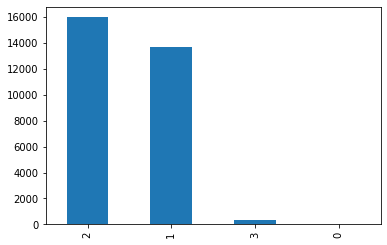

In [36]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

Or a better one even

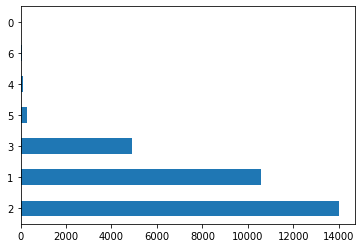

In [37]:
df.EDUCATION.value_counts().plot(kind = "barh")

Which shows immediately that some classes will need some cleaning.

Let's move on with what was supposed to be the first exploration

## Numerical variables

I want to use some histograms to have a feel of the distribution, checking if they make sense, the presence of outliers etc

In [38]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

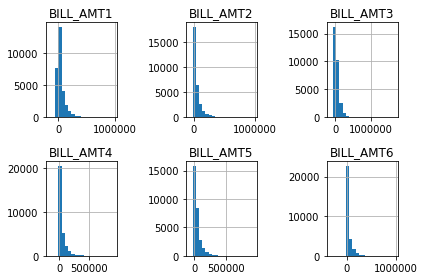

In [39]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

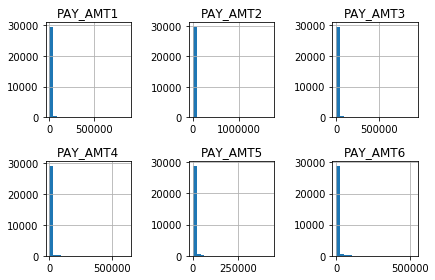

In [40]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

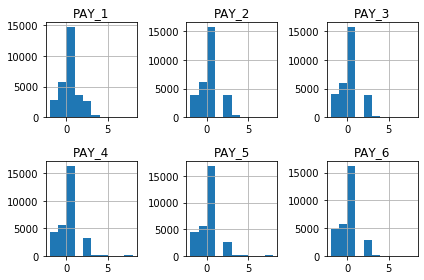

In [41]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#this is probably more of a category

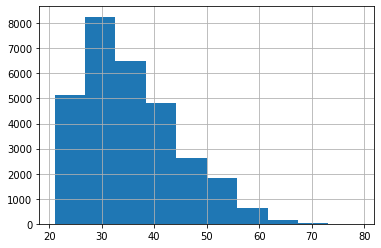

In [42]:
df.AGE.hist()

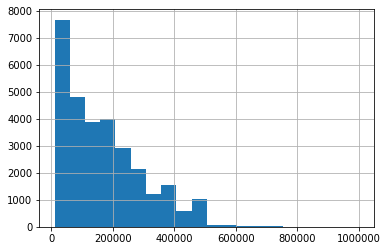

In [43]:
df.LIMIT_BAL.hist(bins = 20)

What I observe is that the quantities referred to some amount of money have a very large range, which can cause problems to some some models (for example in linear regression models)

# Data Cleaning

As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3). 

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [44]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [45]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

One might wonder what these labels might mean.

* "Other" in education can be an education lower than the high school level.
* "Other" in marriage could be, for example, "divorced". 

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

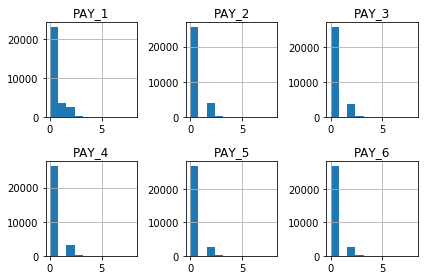

In [46]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

Next, I am puzzled by how wide is the range of possible values in the features regarding money, so let's see, for example the PAY_AMT1 that are anomalous.

In [47]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]
# doesn't look weird after all

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [48]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'def_pay']]
# doesn't look weird after all

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_pay
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


A quick check on all the others reveal that they are not outliers but simply clients with a lot of money.

However, I will keep this in mind in case of algorithms sensible to scales.

## Further analysis

Now that I have fixed what looked strange, I can look at the correlations with the target variable.

The goal is to see how relevant each feature is, what is its meaning, if it can be used to create new features, and, as usual, play a bit with other basic techniques.

In [49]:
df.groupby(['SEX', 'def_pay']).size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

Well, this doesn't look very good, why don't we create a dataframe out of it?

In [50]:
gender = df.groupby(['SEX', 'def_pay']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [51]:
# Another, easier, way is to just use crosstab
pd.crosstab(df.SEX, df.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


We can do two things: plot directly or compute the probability for each gender to default according to our dataset

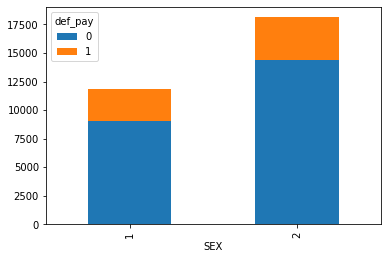

In [52]:
gender.plot(kind='bar', stacked = True)

In [53]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
#this creates a new column in our dataset
gender

def_pay,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


 Let's see a slightly different way of obtaining the same percentages.

In [54]:
df[["SEX", "def_pay"]].groupby(['SEX'], 
                                        as_index=False).mean().sort_values(by='def_pay', 
                                                                           ascending=False)

,SEX,def_pay
0,1,0.241672
1,2,0.207763


In [55]:
# I like playing with options, so here we go
df[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


Considering that about 22% of the customers will default, we see a couple of things:
* there are significantly more women than men
* men are most likely going to default the next month

However, we don't have to jump to any conclusion just yet since there might be some lurking variable that justifies the data better (and, being SEX the first variable we look at, it is most likely the case). However, nice result and move on.

Actually no, before looking at EDUCATION I want to speed up the process and exercise on my poor python skills, let's create a function.


In [56]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

"""
Side note, you could use res[1] and res[0] and still have a function that 
does what we did before. However, that would mean that you are reffering to the column 
labeled 0 and 1, not the position of it. Thus the function will not work if the unstacked 
variable has different values. 

Moreover, a good exercise is to generalize the function so that the unstacked variable can
have more than 2 values
"""

'\nSide note, you could use res[1] and res[0] and still have a function that \ndoes what we did before. However, that would mean that you are reffering to the column \nlabeled 0 and 1, not the position of it. Thus the function will not work if the unstacked \nvariable has different values. \n\nMoreover, a good exercise is to generalize the function so that the unstacked variable can\nhave more than 2 values\n'

In [57]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.

Let's see with MARRIAGE.

In [58]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

All considered, these three categories seem to affect the result we want to predict. Thus we keep them in mind for later. 

I try to explain these first results and, while I can imagine how marital status or education can determine the balance of your credit card, I can't find a way of explaining why the type of genitals can do that as well. This particular result could probably get more meaning when put in the context of the society this people belong to.

Revealing gender inequalities in not our priority (at least not on a beginner notebook on Kaggle), so we move on.

In [59]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [60]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


Now I want to see if my suspects on the payments and the bills have some foundation

In [61]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'def_pay']].sample(30)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,def_pay
27203,2000.0,11822.0,2500.0,10247.0,3500.0,6917.0,4000.0,5612.0,6100.0,-191.0,0.0,-191.0,280000.0,0
16497,700.0,19022.0,1200.0,18646.0,0.0,19621.0,3300.0,16940.0,0.0,17504.0,1000.0,17077.0,20000.0,0
7392,295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1651.0,180000.0,0
20316,0.0,82377.0,1700.0,86575.0,80000.0,13652.0,3795.0,15112.0,1500.0,14131.0,1200.0,29076.0,150000.0,0
9288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,1012.0,1819.0,1819.0,7296.0,150000.0,1
25219,5093.0,28277.0,3000.0,34527.0,22000.0,17853.0,10000.0,23978.0,2145.0,28311.0,0.0,65542.0,150000.0,0
2997,6220.0,30878.0,5000.0,27167.0,8167.0,19529.0,9529.0,10512.0,10512.0,1102.0,0.0,1118.0,80000.0,0
8649,300.0,7228.0,350.0,6995.0,0.0,7256.0,1000.0,6362.0,1362.0,5249.0,1500.0,3978.0,20000.0,1
13159,0.0,281.0,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,1
29600,10859.0,4121.0,4140.0,2328.0,2336.0,33062.0,33243.0,9253.0,9297.0,1601.0,1606.0,833.0,150000.0,0


In [62]:
df[df.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
8177,33699.0,3000.0,31507.0,3,70000.0
11258,22453.0,5080.0,67788.0,2,250000.0
6540,57751.0,0.0,61432.0,2,60000.0
5056,65430.0,2900.0,64139.0,2,120000.0
21651,5975.0,0.0,6220.0,1,10000.0
4801,237094.0,0.0,254951.0,6,190000.0
15126,146635.0,7700.0,142779.0,1,160000.0
19050,18702.0,0.0,20226.0,3,20000.0
47,3034.0,1013.0,4463.0,0,150000.0
4983,132458.0,6101.0,199229.0,0,200000.0


To me it seems that it goes like that:
* I have a BILL of X, I pay Y
* The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'
* The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''
* So on so forth

On top of that I may or may not have months of delay.

It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.

Now I want to see how the month of delay gets assigned. To this end, I will consider only people with no delays 6 months ago and see how their payments go.

In [63]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(20)

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
14945,40640.0,1500.0,40689.0,2
21558,29406.0,1070.0,29914.0,2
3567,203223.0,8006.0,235290.0,2
9638,50524.0,3000.0,49207.0,2
2407,93059.0,4000.0,92203.0,2
25309,15321.0,1500.0,16121.0,2
24841,23618.0,1000.0,30534.0,2
1008,51224.0,3400.0,22779.0,2
14860,79953.0,3200.0,78257.0,2
28841,9798.0,500.0,9594.0,2


In [64]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
2272,244.0,0.0,244.0,2
13895,950.0,0.0,1340.0,2
18795,20000.0,0.0,20000.0,2
19933,2240.0,0.0,2825.0,2
20737,18767.0,0.0,18767.0,2
22212,702.0,0.0,802.0,2
22691,249.0,0.0,27231.0,2
23887,25000.0,0.0,26000.0,2
27196,1170.0,0.0,1573.0,2


I am puzzled by a few things:
* why there is no PAY_5 at 1 but only at 2? This is the first month the client doesn't pay (or doesn't pay enough)
* Sometimes the client did pay but still got a delay value bigger than 0

In [65]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1 > 0) & (df.PAY_2 == 0))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'def_pay']].head(15)

,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT1,PAY_1,LIMIT_BAL,def_pay
26,-425.0,0,1000.0,-109.0,1,60000.0,1
68,-9850.0,0,0.0,-190.0,1,130000.0,0
109,-103.0,0,0.0,-103.0,1,360000.0,0
149,-1100.0,0,22500.0,-1100.0,1,260000.0,0
173,-709.0,0,0.0,-709.0,1,50000.0,1
186,57077.0,0,5295.0,2616.0,1,360000.0,0
216,-946.0,0,0.0,-946.0,1,240000.0,1
276,2715.0,0,0.0,171.0,2,460000.0,1
319,-2.0,0,0.0,-2.0,1,180000.0,0
330,505.0,0,0.0,-179.0,1,200000.0,1


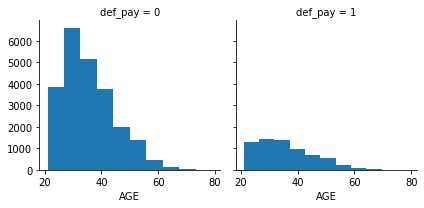

In [66]:
g = sns.FacetGrid(df, col = 'def_pay')
g.map(plt.hist, 'AGE')

This throws me off. There are clients that paid more there were asked to, had even a negative bill in Sept., and still have a month of delay, and even defaulted the next month. I am incline of not considering the variables PAY_n for my models because I can't give sense to them (even though it seems they can play a big role). I can transform them into a binary variable (late/notlate) because that is something I can understand.

**Do not run the next cell if you are not comfortable with my ignorance.**

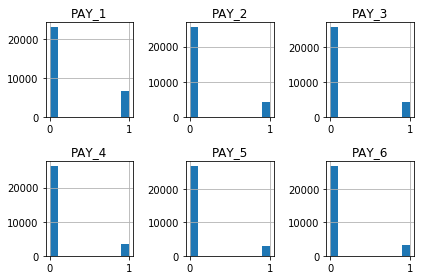

In [67]:
df.loc[df.PAY_1 > 0, 'PAY_1'] = 1
df.loc[df.PAY_2 > 0, 'PAY_2'] = 1
df.loc[df.PAY_3 > 0, 'PAY_3'] = 1
df.loc[df.PAY_4 > 0, 'PAY_4'] = 1
df.loc[df.PAY_5 > 0, 'PAY_5'] = 1
df.loc[df.PAY_6 > 0, 'PAY_6'] = 1
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

Before going to a much funnier part of the notebook, I want to use some seaborn I have seen in other notebook. The variable that gives me a reason to do so is AGE

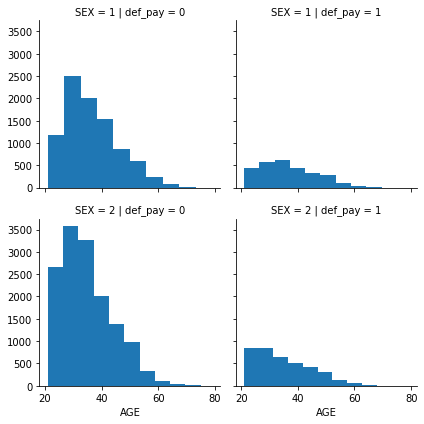

In [68]:
g = sns.FacetGrid(df, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

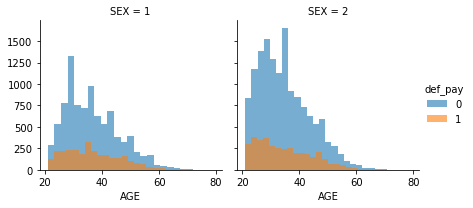

In [69]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

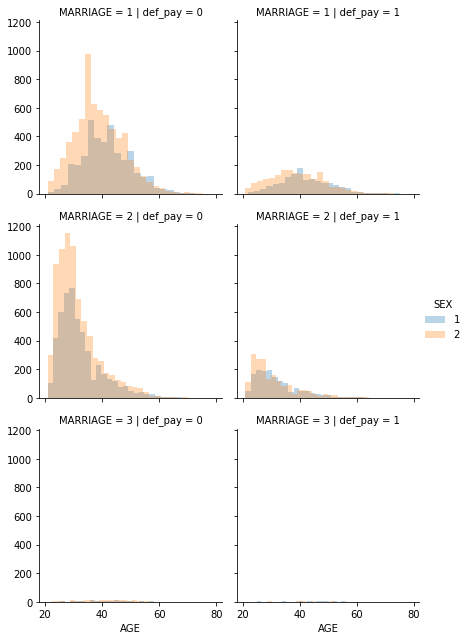

In [70]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

This tells me that I can probably combine age with other categories to get a more descriptive feature

# Feature Engineering

When I talked with more experienced Kagglers or, generically, other Data Scientists about feature engineering I often got the answer "it is more an art than a science". I am always suspicious towards such claims, often used to hide the inability of explaining what leads to some choices. Therefore I will try to be pedantic once more and explain why I do what I do. After that we can see how the previous process changes and it leads to better results or not.

I performed an analysis on the categorical variables before and I got some insight out of it, can I design variables to help my models?

I saw that men are most likely to default and also that married people are most likely to default. Thus why not combine them in a single variable given by the product of the two? I chose these two first because they are both labeled 1,2 and they both decrease the probability of defaulting if their value increase. According to our models, SEX and MARRIAGE are the least important variables, so it can be a good exercise to see if combining them is a waste of time.

This operation will create a category for married man, which I expect to be the one with high probability of defaulting, a combination of married women and single man, a category (expected to be numerically less populated) of "divorced" men (in other words, the "other" in marriage times the "male" in sex), one for single women and one for "divorced" women.

In [71]:
df['SE_MA'] = df.SEX * df.MARRIAGE
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In general it can be good enough, but there can be a better way of doing it.

In [72]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


I like this better because I can see clearly that married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a lowe probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

It can be useful to create age categories.  We can do it in three ways (that I know of).

First, we could simply create a column and put a bunch of filters to fill it with the help of loc.

In [73]:
del df['SE_MA']
df = df.rename(columns={'SE_MA_2': 'SE_MA'})

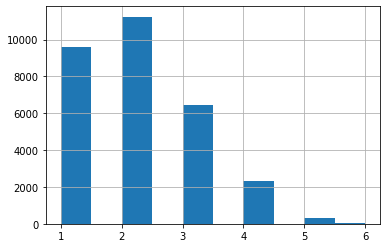

In [74]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

This works gives you control of how big the bins are BUT, let's face it, now that we know how loc works (sort of) it is not practical. We can use the second method that I know, which is to cut

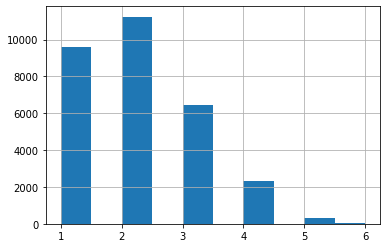

In [75]:
bins = [20, 29, 39, 49, 59, 69, 81]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin2'] = pd.cut(df['AGE'], bins, labels=bins_names)
df.AgeBin2.hist()

We notice 2 things:
* the bins have to be defined in a slightly counter intuitive way (at first) due to the fact that it includes the upper limit (as you can check by just changing the bins). You can play with the option "right" that is True by default
* the bins names have to be less numerous than the bins, i.e. with one bin you do bins = [20,81] and bins_names = [ 1 ] 

There is actually a faster way of doing 6 bins with cut, at the price of losing control on how big these bins are

In [76]:
df['AgeBin3'] = pd.cut(df['AGE'], 6)
df.AgeBin3.value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AgeBin3, dtype: int64

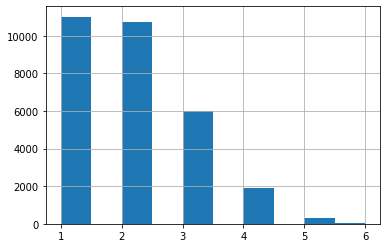

In [77]:
df['AgeBin3'] = pd.cut(df['AGE'], 6, labels=bins_names) #just added one option
df.AgeBin3.hist()

Another way of cutting a countinuos variable can be with a quantile-based discretization. This is done by the function qcut

This can be useful if, for example, you have outliers (like in the balance variable it is possible there will be some) because those outliers would just fall into the extremal categories.

In [78]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6)
df.AgeBin4.value_counts()

(26.0, 30.0]      5886
(34.0, 39.0]      5160
(20.999, 26.0]    5127
(30.0, 34.0]      4683
(45.0, 79.0]      4669
(39.0, 45.0]      4475
Name: AgeBin4, dtype: int64

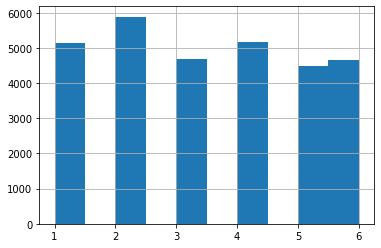

In [79]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6, labels=bins_names)
df.AgeBin4.hist()

We don't need all of them. The normal cut is easier to explain, but I need to get rid to the category 6 since it is not populated enough and can ruin the model. I will group it with the 5, effectively treating every client over 60 in the same way.

I will get rid of all the others.

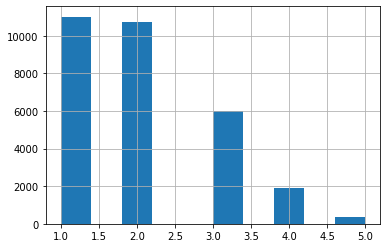

In [80]:
del df['AgeBin2']
del df['AgeBin3']
del df['AgeBin4'] # we don't need these any more
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [81]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [82]:
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


I see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [83]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


Now it is time to do something that indicates being a client at a given month or not. I would say that if PAY, BILL_AMT and PAY_AMT are 0, then we are not talking about a client

In [84]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].def_pay.count(),
          df[df.Client_5 == 1].def_pay.count(),
          df[df.Client_4 == 1].def_pay.count(),
          df[df.Client_3 == 1].def_pay.count(),
          df[df.Client_2 == 1].def_pay.count(),
          df[df.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

I will need these variables if I want to see how my predictions will change if I anticipate them (i. e. if I use data up to june instead of up to september)

Next, I want something to describe the expenses of a client, following the idea I have expressed before when I looked at the BILL AMT and the PAY AMT. I am thinking of something like average expenses at any given month (again, for this first prediction I will just care about the last month but I might need the others later). Moreover, I want to give some context to it, so I will divide that number by LIMIT_BAL, so that we have a sort of extimation of how "careless" a client is.

In [85]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
25017,140000.0,0.005571,780.0,0.002786,0.0,0.002786,390.0,0.003482,780.0,0.002786,780.0,1
3920,230000.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.002287,2630.0,1
28294,100000.0,0.021770,77082.0,0.135645,99339.0,0.096270,97303.0,0.076025,95169.0,0.070558,96636.0,0
27720,140000.0,0.004971,696.0,0.004971,696.0,0.004971,696.0,0.004971,696.0,0.006171,1536.0,1
25733,270000.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005417,5850.0,0.005067,990.0,0
18317,40000.0,0.019025,41389.0,0.021125,39380.0,0.038508,40311.0,0.057769,40633.0,0.055965,40633.0,1
19093,150000.0,0.019027,40669.0,0.017213,41579.0,0.017173,42306.0,0.016957,42652.0,0.022525,47372.0,0
15604,120000.0,0.006892,1654.0,0.006892,827.0,0.006892,827.0,0.006892,827.0,0.006892,827.0,0
10189,500000.0,0.241468,316208.0,0.133351,319331.0,0.101907,323841.0,0.085461,313903.0,0.074296,238708.0,0
6343,150000.0,0.002213,19828.0,0.002660,20294.0,0.002471,18608.0,0.002855,18209.0,0.003059,17790.0,1


One last thing: how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature (in my mind it has more meaning, maybe I am wrong). Again, I want to keep the historical trend of the variable

In [86]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
13302,0.995593,0.996313,0.985517,0.982423,0.995623,0.998813,0
19332,0.962920,0.943580,0.911880,0.942680,0.973480,0.937540,0
26427,0.209659,0.230018,0.113086,-0.012864,-0.008336,0.010745,0
16792,0.240700,0.223700,0.201300,0.178900,0.340500,0.386600,0
16729,0.276180,0.261640,0.273780,0.320240,0.303520,0.324480,1
21214,0.432975,0.447912,0.050638,0.076563,-0.011950,-0.011500,0
11097,0.401929,0.411400,0.424257,0.437757,0.452914,0.468586,0
26422,0.835552,0.843319,0.780767,0.780181,0.777800,0.738552,0
7269,0.935523,0.941908,0.966200,0.950015,0.985169,0.966900,0
24123,0.992800,0.992800,0.992800,0.992800,0.992800,0.984820,0


It is now time to move on to the (hopefully less blind) machine learning part of this notebook.

# Find my balance and learn my machine

We have seen in the blind machine learning section of this notebook how poorly the algorithm performs if we have **imbalanced classes**. As far as I know, there are 2 "methods" of doing so: by appropriately sampling my training data and by using the right algorithm. It is something very new for me, so I will try to do both, step by step.

First, I decide which features I want to include in my models and split the data into training and testing set. It is very important to never let the learning algorithm "see" the testing set or you will always be considered a cheater.

I will not include the PAY_n features because I don't know how they appear, I will use AgeBin rather than AGE, I will not include SEX because the small correlation do not make sense to me and I have created two categories that include SEX.

In [87]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = df['def_pay'].copy() # target
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Samples, samples, samples

Within my train dataset I still have a certain unbalance in the target class, thus I can do the following:

* I don't care, I will just pick the best model
* I upsample the minority class
* I downsample the majority class
* I create a syntetic sample
* I will just do all of it and see how it goes.

IMPORTANT: everything will happen on the train dataset

In [88]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
15368,220000.0,1,1,1,1,0,0,0,1,34510.0,...,0.003118,0.002956,0.003181,0.003316,0.823959,0.834845,0.841305,0.846995,0.843136,1
28933,200000.0,1,1,1,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
26925,130000.0,2,3,1,1,1,0,0,0,126749.0,...,0.054965,0.050574,0.044888,0.039180,-0.015069,-0.018585,-0.017300,-0.045131,0.025008,1
29102,180000.0,2,1,0,0,0,0,0,0,0.0,...,0.008556,0.007093,0.005319,0.004256,0.991644,0.991244,0.995833,1.000000,1.000000,0
8388,180000.0,2,1,0,0,0,0,0,0,375.0,...,0.002083,0.002083,0.002083,0.002083,0.997917,0.995833,0.997917,0.997917,0.997917,1
13285,100000.0,3,3,0,0,0,0,0,0,62300.0,...,0.007180,0.095873,0.074938,0.061960,0.605310,0.615000,0.355520,0.362410,0.377000,0
29979,180000.0,1,1,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
10632,50000.0,1,2,0,1,1,0,0,0,5713.0,...,0.009780,0.006520,0.036810,0.030676,0.986960,0.980440,1.019560,0.891880,0.885740,1
29806,200000.0,2,2,0,0,0,0,1,0,176642.0,...,0.028962,0.027625,0.024717,0.022995,0.055350,0.016340,0.071390,0.097895,0.116790,0
4853,200000.0,3,1,0,0,0,0,0,0,199343.0,...,0.030395,0.037850,0.039955,0.041258,0.018295,0.012870,-0.004260,-0.000350,0.003285,1


In [89]:
from sklearn.utils import resample

In [90]:
# Separate majority and minority classes
df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

18677
-----------
5323
-----------
0    18677
1     5323
Name: def_pay, dtype: int64


In [91]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1    18677
0    18677
Name: def_pay, dtype: int64

In [92]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

1    5323
0    5323
Name: def_pay, dtype: int64

The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling.

The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time

To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [93]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
sm = SMOTE(random_state=589, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

So now we have 4 training sets:

* X_train, y_train, with their unbalance and their authenticity
* df_upsample, which is balanced but at overfitting risk
* df_downsample, which will be fast but also potentially useless in terms of predictability (the test set is even bigger than it)
* X_SMOTE, y_SMOTE, which is syntetic and I don't really know it but should avoid overfitting

I will do everything 4 times so that I can see the results. Now, in my mind the process goes like that:

1. K-fold evaluation, run on different models should give us an idea on which one is more stable towards splitting of train and test
2. Hyperparameter selection, so that we can have the best version of every algorithm
3. Training
4. Testing

In these steps one pitfall we encountered already is how to evaluate. We have already seen that using accuracy is not very convenient, while using (for example) the f1 metric is.

Another step would be probability calibration, which is a topic I am not particulartly familiar with (ok, *another* topic I am not particularly familiar with, smarty pants) and I will ignore for now but I will maybe elaborate in a future version of this notebook.

# Algorithm Selection

A very common (and profitable) technique is to use ensambles: combinations of different classifiers that create a more robust model. The basic predictor will be again a Decision tree and I will test a few different ensambles

The main "classes" are:

* baggin ensambles: which reduce the chances of overfitting by running a series of uncostrained learners in parallel and combine them
* boosting ensambles: which improve the the flexibility of simple models by running a series of constrained learners in sequence. Each one of them will learn from the mistakes of the previous one. At the end it combines them in one unconstrained learner

As a bagging ensambles I know **Random Forest**. It trains on a large number of trees and combine them. The randomness comes from the fact that each tree is allowed to choose from a random subset of features to split on and each tree is trained on a random subset of observations.

The first boosting ensamble I know is the **Gradient Tree Boosting**. It tries to minimize a loss function (difference between the real value and output of the learner) using the gradient descent method. Then there is **Ada-Boost** that trains the learners to make strong prediction by focusing on examples harder and harder to classify. This is done by assigning weights to the instances and increasing the one of missclassified one.

There are others, in Kaggle is very popular XG Boost, but I don't know how they work so I will ignore them even though they generally give better results.

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# classifier list for the normal training set
clf_list = [DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"), 
            RandomForestClassifier(n_estimators = 100, class_weight = "balanced"), 
            AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"),
                               n_estimators = 100), 
            GradientBoostingClassifier(), 
            XGBClassifier()
           ]
# the parameters are set in order to have the same kind of tree every time

In [ ]:
# use Kfold to evaluate the normal training set
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_train)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['def_pay']
        valid_feats = valid[features]
        valid_label = valid['def_pay']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
    
#create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_normal = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_normal)

In [ ]:
# classifier list for the downsampled training set
clf_list = [DecisionTreeClassifier(max_depth = 3), 
            RandomForestClassifier(n_estimators = 100), 
            AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators = 100), 
            GradientBoostingClassifier(), 
            XGBClassifier()
           ]
# the parameters are set in order to have the same kind of tree every time


In [ ]:
# use Kfold to evaluate the upsampled training set
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_downsampled)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['def_pay']
        valid_feats = valid[features]
        valid_label = valid['def_pay']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
    
#create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_downsampled = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_downsampled)

I need some help to do it for the SMOTE and the upsampled df's because the indexing is different. Also, these results are confusing for now.

I will focus on the three ensambles I know and tune them

### Random Forest with different samples

In [ ]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

In [ ]:
#cell added because on Kaggle it takes too much time to run
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
print(0.449643478486)

In [ ]:
y_upsampled = df_upsampled.def_pay
X_upsampled = df_upsampled.drop(['def_pay'], axis= 1)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

In [ ]:
#cell added because on Kaggle it takes too much time to run
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(0.93295704261)

In [ ]:
y_downsampled = df_downsampled.def_pay
X_downsampled = df_downsampled.drop(['def_pay'], axis = 1)

In [ ]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_downsampled = grid_forest.best_estimator_

In [ ]:
forest_downsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(0.686692645307)

In [ ]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

In [ ]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(0.831423121548)

The number of estimators is not worth to be searched in this way, I will do some tests later.

I can see how upsampling is helping already, we will see the results on the test later. I can also see how the models less prone to overfitting can use more estimators to get a better result.

### Ada Boost Classifier with different samples


In [ ]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
                        param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

In [ ]:
ada_normal = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=300, random_state=None)
print(0.408435692436)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

In [ ]:
ada_upsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)
print(0.689430792925)

In [ ]:
# downsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_downsampled = grid_ada.best_estimator_

In [ ]:
ada_downsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)
print(0.673783146613)

In [ ]:
# SMOTE training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_SMOTE = grid_ada.best_estimator_

In [ ]:
ada_SMOTE = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
          n_estimators=200, random_state=None)
print(0.797835003041)

### Gradient Boost with different samples

In [ ]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

In [ ]:
gbc_normal = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
print(0.443888650557)

In [ ]:
#upsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

In [ ]:
gbc_upsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
print(0.831025217754)

In [ ]:
#downsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_

In [ ]:
gbc_downsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
print(0.67183972731)

In [ ]:
#SMOTE training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

In [ ]:
gbc_SMOTE = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
print(0.78976849349)

The common result is that the model trained on the normal dataset, which is unbalanced, give a lower f1 score. This also tells me that the a penalized learner (the one with "balanced" options) do not perform as well as one that learned on a balanced sample. The upsampled learners seem to be more promising but, as mentioned, they fall into the overfitting trap more often, so we will see how they perform on the test data.




# Training and testing

It is time to see how well our models perform for real. I will run them all and hopefully see significant differences in how they reach a result.

## Random Forests

In [ ]:
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Upsample training
%time forest_upsampled.fit(X_upsampled, y_upsampled)
predictions = forest_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_upsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Downsample training
%time forest_downsampled.fit(X_downsampled, y_downsampled)
predictions = forest_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# SMOTE training
%time forest_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = forest_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_SMOTE, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

## Ada Boost

In [ ]:
# Normal sample training
%time ada_normal.fit(X_train, y_train)
predictions = ada_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Upsample training
%time ada_upsampled.fit(X_upsampled, y_upsampled)
predictions = ada_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_upsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Downsample training
%time ada_downsampled.fit(X_downsampled, y_downsampled)
predictions = ada_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# SMOTE training
%time ada_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = ada_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_SMOTE, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

## Gradient Boosting

In [ ]:
# Normal sample training
%time gbc_normal.fit(X_train, y_train)
predictions = gbc_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(gbc_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Upsample training
%time gbc_upsampled.fit(X_upsampled, y_upsampled)
predictions = gbc_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(gbc_upsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# Downsample training
%time gbc_downsampled.fit(X_downsampled, y_downsampled)
predictions = gbc_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(gbc_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

In [ ]:
# SMOTE training
%time gbc_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = gbc_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(gbc_SMOTE, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

These results are certainly not good. I can see how some aspects of the predictions were improved by a more scientific way of training the models, but I can't see anyone using them for any practical purpose.

In spite of using very basic models and not going too deep into how to improve them, I can see that setting a specific goal would have directed this notebook in a more specific direction. For example, if the interest of a bank is to predict the default of its clients, it might be better to use a model less incline to return false negatives. However, if the bank (and it is most likely the case) will then invest resources to prevent the default of its clients, the role of false positives will become more and more relevant.

In other words, here I have evaluated everything with a generally good indicator (the f1-score) but my goal will very rarely be to get the highest result. Thus it can be a nice thing to define a cost function myself, which would take into account the cost of TP, FP, TN, and FN, and train my models in order to minimize it.

More importantly, I analyzed and created features without using any domanin knowledge, but rather just what I can define as common sense. This is not the right way of proceeding because it can push me in the wrong direction and then get me very poor results. Just saying.

On the technical point of view, I hope this is going to be a nice starting point, I know more things than when I started and thus I don't feel it was a complete waste of time. Speaking of which, the grid search was, I feel, a complete waste of time. Now we know.

If you have any recommendations on how to improve my code or, even better, you have noticed that I have completely overlooked an important aspect of the problem, please let me know.